# Puerta S o Z90

### Explicación de la puerta

Representa una rotación de 90º sobre el eje Z de la esfera de Bloch. Por eso también se le conoce como puerta Z90. Su representación matricial es: 

$$
S =\begin{bmatrix}
1 & 0 \\
0 & i
\end{bmatrix}
$$

### Circuito con Qiskit y Matplot 


Circuito con la puerta S: 


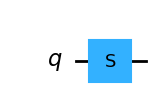

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

#Circuito básico de puerta S (sin medir)
qc = QuantumCircuit(1)
qc.s(0)

print("\nCircuito con la puerta S: ")
qc.draw('mpl')

### Visualización de la esfera de Bloch 


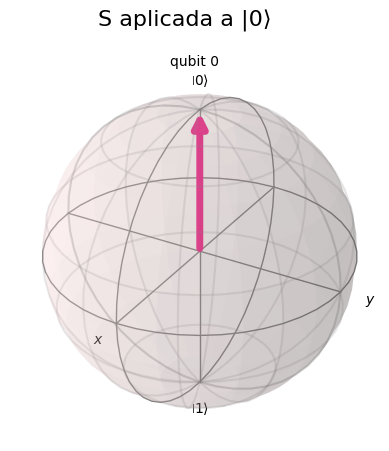

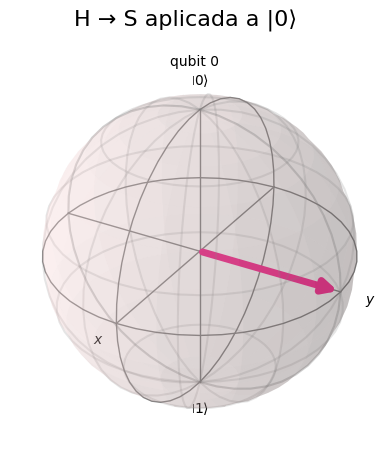

In [2]:
qc_with_H = QuantumCircuit(1)
qc_with_H.h(0)
qc_with_H.s(0)

state_not_H = Statevector(qc)
state_with_H = Statevector(qc_with_H)

display(plot_bloch_multivector(state_not_H, title= "S aplicada a |0⟩ "))
display(plot_bloch_multivector(state_with_H, title= "H → S aplicada a |0⟩ "))


### Medición de los circuitos tras un shot y 1024 shots


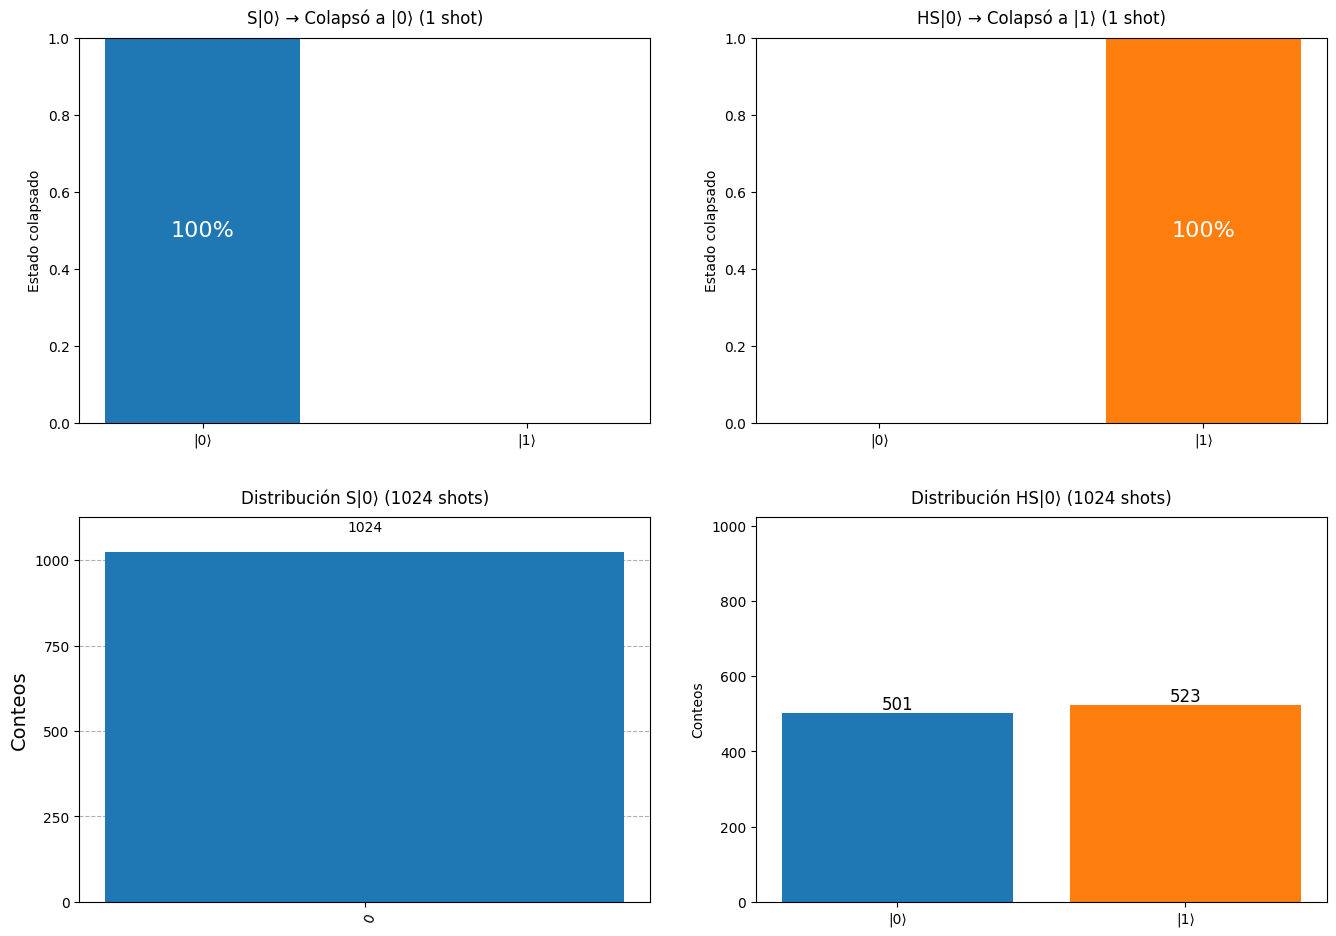

In [5]:
qc_not_H = QuantumCircuit(1,1)
qc_not_H.s(0)
qc_not_H.measure(0,0)

qc_with_H = QuantumCircuit(1,1)
qc_with_H.h(0)
qc_with_H.s(0)
qc_with_H.measure(0,0)

simulator = Aer.get_backend('qasm_simulator')

result_not_H = simulator.run(transpile(qc_not_H,simulator), shots = 1, memory = True).result()
result_with_H = simulator.run(transpile(qc_with_H,simulator), shots = 1, memory = True).result()
measure_not_H = result_not_H.get_memory()[0]
measure_with_H = result_with_H.get_memory()[0]

counts_not_H = simulator.run(transpile(qc_not_H, simulator), shots=1024).result().get_counts()
counts_with_H = simulator.run(transpile(qc_with_H, simulator), shots=1024).result().get_counts()

plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
plt.bar(['|0⟩', '|1⟩'],
        [1 if measure_not_H == '0' else 0, 1 if measure_not_H == '1' else 0],
        color=['#1f77b4', '#ff7f0e'], width=0.6)
plt.title("S|0⟩ → Colapsó a |{}⟩ (1 shot)".format(measure_not_H), fontsize=12, pad=10)
plt.ylim(0, 1)
plt.ylabel("Estado colapsado")

for i, val in enumerate([measure_not_H == '0', measure_not_H == '1']):
    plt.text(i, 0.5, f"{100 if val else 0}%", 
             ha='center', va='center', fontsize=16, color='white')


plt.subplot(2, 2, 2)
plt.bar(['|0⟩', '|1⟩'], 
        [1 if measure_with_H == '0' else 0, 1 if measure_with_H == '1' else 0],
        color=['#1f77b4', '#ff7f0e'], width=0.6)
plt.title("HS|0⟩ → Colapsó a |{}⟩ (1 shot)".format(measure_with_H), fontsize=12, pad=10)
plt.ylim(0, 1)
plt.ylabel("Estado colapsado")


for i, val in enumerate([measure_with_H == '0', measure_with_H == '1']):
    plt.text(i, 0.5, f"{100 if val else 0}%", 
             ha='center', va='center', fontsize=16, color='white')


plt.subplot(2, 2, 3)
plot_histogram(counts_not_H, color=['#1f77b4'], ax=plt.gca())
plt.title("Distribución S|0⟩ (1024 shots)", fontsize=12, pad=10)
plt.ylabel("Conteos")

plt.subplot(2, 2, 4)

bars = plt.bar(['|0⟩', '|1⟩'], 
               [counts_with_H.get('0', 0), counts_with_H.get('1', 0)],
               color=['#1f77b4', '#ff7f0e'])


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, 
             f'{int(height)}', 
             ha='center', va='bottom', fontsize=12)

plt.title("Distribución HS|0⟩ (1024 shots)", fontsize=12, pad=10)
plt.ylabel("Conteos")
plt.ylim(0, 1024) 


plt.tight_layout(pad=3.0)
plt.show()

### Circuito con medición 


Circuito con medición:


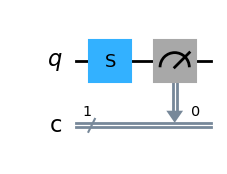

In [6]:
print("\nCircuito con medición:")
qc_not_H.draw('mpl')